<h2>We have to perform regression analysis on this dataset to predict charges i.e Insurance cost to be given to an indiviual based on the given parameters. </h2>

<h3>Columns :

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking 

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance</h3>

<h2>Importing the needed librabries</h2>

In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import scipy.stats as stats
import pickle

<h2>Importing the dataset and doing exploratory data analysis</h2>

In [256]:
df = pd.read_csv(r'insurance.csv')

In [257]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500



<h2>We have to see if our assumptions of OLS linear regression are correct. We'll check them after performing OLS. for more info read https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/</h2>

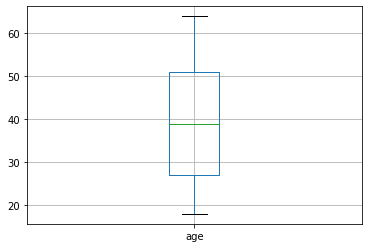

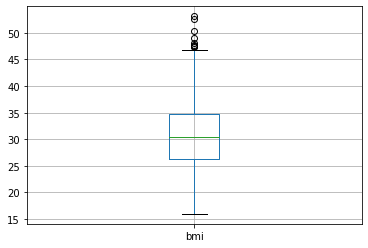

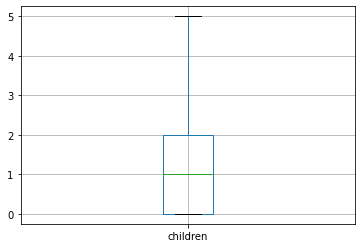

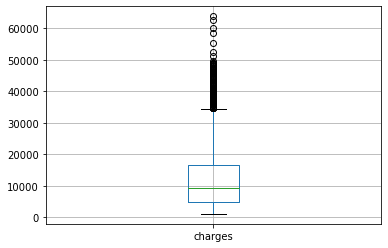

In [258]:
colname=[]
for x in df.columns:
        if df[x].dtype=='int64' or df[x].dtype=='float64':
            colname.append(x)
            
for x in colname:
    df.boxplot(column=x)
    plt.show()


<h2>We can see many outliers in the dataset so we'll skew them later </h2>

In [259]:
corr = df.corr()

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

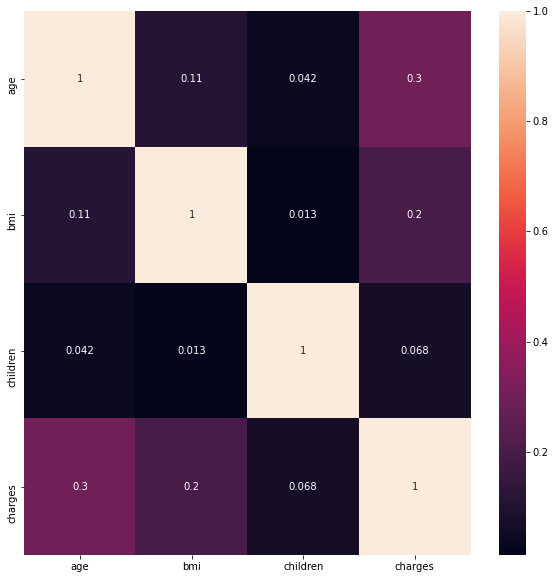

In [292]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot= True)
corr['charges']

<h2>There is no evidence of multicollinearity here so we can keep all features</h2>

<Figure size 2160x1080 with 0 Axes>

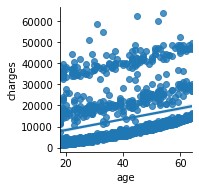

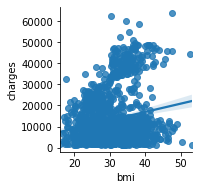

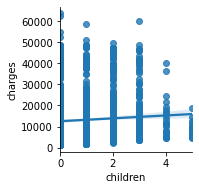

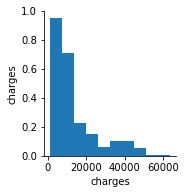

In [261]:
plt.figure(figsize=(30,15))
for x in colname:
    sns.pairplot(df,x_vars=x,y_vars='charges',kind='reg')


<h2>Ignoring the children variable as it is a discrete type, other variables show a weak linear relationship with our dependent variable </h2>

<AxesSubplot:xlabel='charges'>

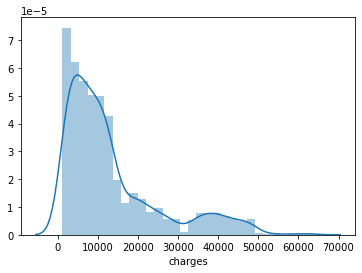

In [262]:
sns.distplot(df['charges'],hist=True)

<h2>We can see that dependent variable is not normally distributed. So we have to applyy log transformation and then after predictions we'll again apply antilog to see original predicted charges</h2>

In [263]:
y= np.log1p(df['charges'])

<AxesSubplot:xlabel='charges'>

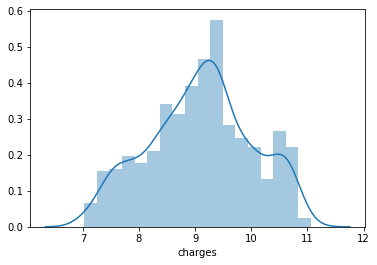

In [264]:
sns.distplot(y,hist=True)

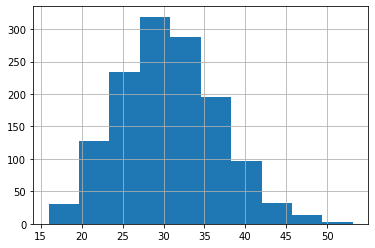

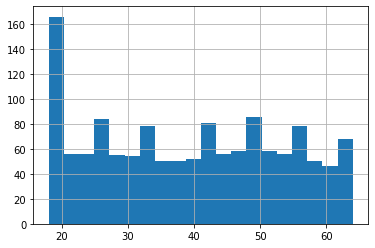

In [265]:
df['bmi'].hist()
plt.show()
df['age'].hist(bins=20)
plt.show()

<h2> BMI shows a little skewness but it is acceptable</h2> 

In [266]:
df = pd.get_dummies(df)

In [267]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [268]:
y

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1338, dtype: float64

<h2>We have spliited our data in X = indepedent variables and Y = independent variable. Now  we have to perform train_test_split to get testing data and training data for model building</h2>

In [269]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=123,test_size=0.2)

<h2> We'll first start with gradient descent and ordinary least squares as base models and then perform more regression models like Ridge and Lasso. After that Decision Tree Regression and then bagging abd boosting models</h2>

In [270]:
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
Y_pred_train = model.predict(X_train)

r2=r2_score(Y_test,Y_pred)
print("R2_score for testing data = ", r2)
print( "r2_score for training data ",model.score(X_train, Y_train))
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root mean square error = ",rmse)
adj_rsquare = 1 -(1-r2)*(len(y)-1)/(len(y)-len(X.columns)-1)
print("Adj R2 = ",adj_rsquare)

R2_score for testing data =  0.8098695145210738
r2_score for training data  0.7578753247606235
Root mean square error =  0.38673646803913403
Adj R2 =  0.8082922631332395


In [271]:
model = Lasso()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
Y_pred_train = model.predict(X_train)

r2=r2_score(Y_test,Y_pred)
print("R2_score for testing data = ", r2)
print( "r2_score for training data ",model.score(X_train, Y_train))
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root mean square error = ",rmse)
adj_rsquare = 1 -(1-r2)*(len(y)-1)/(len(y)-len(X.columns)-1)
print("Adj R2 = ",adj_rsquare)

R2_score for testing data =  0.20875902371631272
r2_score for training data  0.2897915424863059
Root mean square error =  0.7889393775651913
Adj R2 =  0.2021951845465385


<h2>Clearly Lasso is not giving us good results so we have to look for more models</h2>

In [272]:
model = Ridge()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
Y_pred_train = model.predict(X_train)

r2=r2_score(Y_test,Y_pred)
print("R2_score for testing data = ", r2)
print( "r2_score for training data ",model.score(X_train, Y_train))
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root mean square error = ",rmse)
adj_rsquare = 1 -(1-r2)*(len(y)-1)/(len(y)-len(X.columns)-1)
print("Adj R2 = ",adj_rsquare)


R2_score for testing data =  0.8096913402968641
r2_score for training data  0.757871417912019
Root mean square error =  0.38691763397426104
Adj R2 =  0.8081126108423131


<h2>Still we need to improve our model</h2>

In [273]:

x=sm.add_constant(X_test)
test_model = sm.OLS(Y_test,x).fit()

In [274]:
test_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     144.2
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           7.97e-91
Time:                        20:25:16   Log-Likelihood:                -120.78
No. Observations:                 268   AIC:                             259.6
Df Residuals:                     259   BIC:                             291.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.5183      0.060     59.104      0.000       3.401       3.636
age                  0.0342      0.002     19.543      0.000       0.031       0.038
bmi                  0.0073      0.004      1.858      0.064      -0.000       0.015
children             0.0887      0.021      4.253      0.000       0.048       0.130
sex_female           1.7926      0.039     46.306      0.000       1.716       1.869
sex_male             1.7257      0.038     45.966      0.000       1.652       1.800
smoker_no            0.9427      0.039     24.053      0.000       0.865       1.020
smoker_yes           2.5757      0.043     59.469      0.000       2.490       2.661
region_northeast     0.9393      0.041     22.708      0.000       0.858       1.021
region_northwest     0.9050      0.046     19.815      0.000       0.815       0.995
region_southeast     0.7950      0.047     16.739      0.000       0.701       0.889
region_southwest     0.8791      0.044     20.100      0.000       0.793       0.965
==============================================================================
Omnibus:                       97.502   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.747
Skew:                           1.498   Prob(JB):                     9.40e-83
Kurtosis:                       7.986   Cond. No.                     1.30e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.22e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

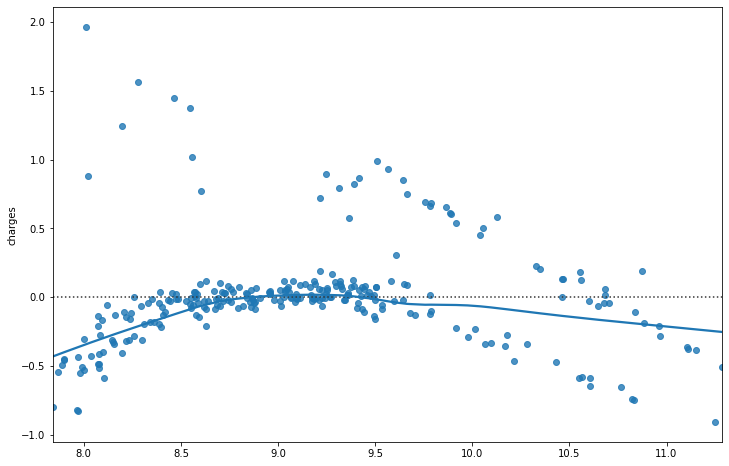

In [275]:

plot=plt.figure(1)
plot.set_figheight(8)
plot.set_figwidth(12)

#fitted values

model_fitted_y=test_model.fittedvalues
model_fitted_y
plot.axes[0]=sns.residplot(model_fitted_y,Y_test, data=df,lowess=True)

<h2>We can see no pattern  so they are random</h2>

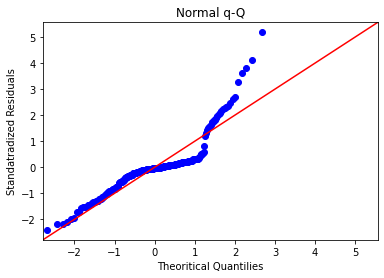

In [276]:
#Errors should follow aprrox NORMAL DISTRIBUTION
res =test_model.resid
fig=sm.qqplot(res,fit=True,line='45')
plt.title("Normal q-Q")
plt.xlabel("Theoritical Quantilies")
plt.ylabel("Standatradized Residuals")
plt.show()

<h2>The errors follow approximatey normal distribution</h2>

<AxesSubplot:>

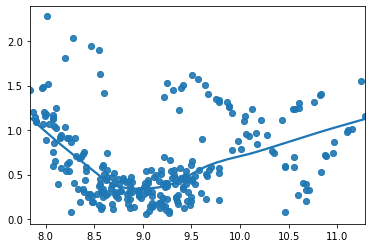

In [277]:
#Errors should follow a constant variance
#normalized residuals
model_norm_residuals=test_model.get_influence().resid_studentized_internal
#absolute squared normalized residuals
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(model_norm_residuals))

plt.scatter(model_fitted_y,model_norm_residuals_abs_sqrt,alpha=0.5)

sns.regplot(model_fitted_y,model_norm_residuals_abs_sqrt,lowess=True)

<h2>We can say that  the data is heteroscadistic. But let's ignore it for the moment. This is a reason we do not rely on OLS and other regression models perform better</h2>

In [278]:

X = df.drop('charges',axis = 1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [279]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train,Y_train)
clf.score(X_train,Y_train)
Y_pred = model.predict(X_test)
Y_pred_train = model.predict(X_train)

r2=r2_score(Y_test,Y_pred)
print("R2_score for testing data = ", r2)
print( "r2_score for training data ",model.score(X_train, Y_train))
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root mean square error = ",rmse)
adj_rsquare = 1 -(1-r2)*(len(y)-1)/(len(y)-len(X.columns)-1)
print("Adj R2 = ",adj_rsquare)

R2_score for testing data =  0.8096913402968641
r2_score for training data  0.757871417912019
Root mean square error =  0.38691763397426104
Adj R2 =  0.8081126108423131


In [280]:

regressor = DecisionTreeRegressor(random_state=123,max_depth=6)
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)
r2=r2_score(Y_test,Y_pred)
print( "r2_score for training data ",r2_score(Y_pred_train, Y_train))
print("R2_score for testing data = ", r2_score(Y_test,Y_pred))

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root mean square error = ",rmse)
adj_rsquare = 1 -(1-r2)*(len(y)-1)/(len(y)-len(X.columns)-1)
print("Adj R2 = ",adj_rsquare)

r2_score for training data  0.8420373449682915
R2_score for testing data =  0.8527562418093626
Root mean square error =  0.34033584690533586
Adj R2 =  0.851534762669018


In [281]:


regressor = RandomForestRegressor(n_estimators=1000,max_depth=4,n_jobs=10,random_state=123)
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)
r2=r2_score(Y_test,Y_pred)
print( "r2_score for training data ",r2_score(Y_pred_train, Y_train))
print("R2_score for testing data = ", r2_score(Y_test,Y_pred))

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root mean square error = ",rmse)
adj_rsquare = 1 -(1-r2)*(len(y)-1)/(len(y)-len(X.columns)-1)
print("Adj R2 = ",adj_rsquare)

r2_score for training data  0.7956810836417606
R2_score for testing data =  0.8832302513919372
Root mean square error =  0.30307800556086745
Adj R2 =  0.8822615732360634


In [283]:
regressor = AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=100,max_depth=4,n_jobs=10,random_state=123))
regressor.fit(X_train,Y_train)
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)
r2=r2_score(Y_test,Y_pred)
print( "r2_score for training data ",r2_score(Y_pred_train, Y_train))
print("R2_score for testing data = ", r2_score(Y_test,Y_pred))

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root mean square error = ",rmse)
adj_rsquare = 1 -(1-r2)*(len(y)-1)/(len(y)-len(X.columns)-1)
print("Adj R2 = ",adj_rsquare)

r2_score for training data  0.6771982975127595
R2_score for testing data =  0.8156436426310283
Root mean square error =  0.3808187360706111
Adj R2 =  0.8141142912501393


In [284]:
regressor =GradientBoostingRegressor(n_estimators=200,max_depth=3,random_state=123,max_features='auto')
regressor.fit(X_train,Y_train)
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)
r2=r2_score(Y_test,Y_pred)
print( "r2_score for training data ",r2_score(Y_pred_train, Y_train))
print("R2_score for testing data = ", r2_score(Y_test,Y_pred))

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root mean square error = ",rmse)
adj_rsquare = 1 -(1-r2)*(len(y)-1)/(len(y)-len(X.columns)-1)
print("Adj R2 = ",adj_rsquare)

r2_score for training data  0.8935556749119793
R2_score for testing data =  0.8670458212445682
Root mean square error =  0.3234001700563942
Adj R2 =  0.8659428831100963


In [285]:
regressor = (XGBRegressor(max_depth = 5,n_estimators =100,alpha = 0.01,eta = 0.1))
regressor.fit(X_train,Y_train)
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)
r2=r2_score(Y_test,Y_pred)
print( "r2_score for training data ",r2_score(Y_pred_train, Y_train))
print("R2_score for testing data = ", r2_score(Y_test,Y_pred))

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root mean square error = ",rmse)
adj_rsquare = 1 -(1-r2)*(len(y)-1)/(len(y)-len(X.columns)-1)
print("Adj R2 = ",adj_rsquare)

r2_score for training data  0.9123789849598507
R2_score for testing data =  0.8706315588001206
Root mean square error =  0.31900935622607113
Adj R2 =  0.8695583666031381


<h2>We have finally found the best algorithm for the model and we'll use this for final prediction. We have to do an exponential transformation on Y because we did log transformation while preprocesing </h2>

In [286]:
y_pred=regressor.predict(X)
y_pred = np.expm1(y_pred)

In [287]:
df['Predicted Insurance'] = y_pred

In [288]:
df['Difference'] = round(((df['charges'] - df['Predicted Insurance'])*100/df['charges']))

In [289]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,Predicted Insurance,Difference
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,18250.406250,-8.0
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,2028.438232,-18.0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,4906.125488,-10.0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,7560.762207,66.0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,3826.074707,1.0


<h2>We can see the difference in predicted values and actual values in percentages. Now we can save this model for future purpose.</h2>

In [290]:
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

<h2>The below code can be used to load the saved model</h2>

In [291]:

#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)